In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense

In [0]:
from keras.optimizers import Adam

In [0]:
points = 500
centers = [[-1,1],[-1,-1],[1,-1]]


In [0]:
from sklearn import datasets

In [0]:
X,y = datasets.make_blobs(n_samples=points,random_state=123,centers=centers,cluster_std=0.4)

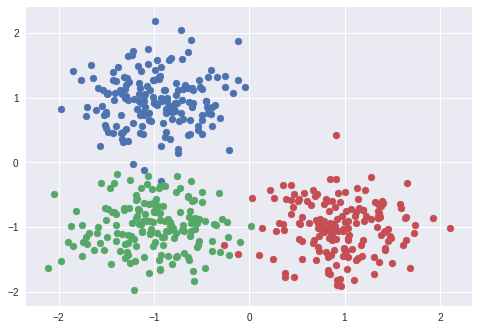

In [71]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
y_cat = to_categorical(y,3)

In [0]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

In [0]:
model = Sequential()

In [0]:
model.add(Dense(3,input_shape=(2,),activation="softmax"))

In [0]:
adam = Adam(lr=0.01)

In [0]:
model.compile(adam,'categorical_crossentropy',metrics=['accuracy'])

In [79]:
h = model.fit(x=X,y=y_cat,verbose=1,batch_size=20,epochs=10)

Epoch 1/10
500/500 [==============================] - 0s 478us/step - loss: 0.9721 - acc: 0.5400
Epoch 2/10
500/500 [==============================] - 0s 61us/step - loss: 0.6624 - acc: 0.8260
Epoch 3/10
500/500 [==============================] - 0s 55us/step - loss: 0.4802 - acc: 0.9540
Epoch 4/10
500/500 [==============================] - 0s 60us/step - loss: 0.3737 - acc: 0.9840
Epoch 5/10
500/500 [==============================] - 0s 52us/step - loss: 0.3052 - acc: 0.9860
Epoch 6/10
500/500 [==============================] - 0s 59us/step - loss: 0.2581 - acc: 0.9860
Epoch 7/10
500/500 [==============================] - 0s 58us/step - loss: 0.2242 - acc: 0.9880
Epoch 8/10
500/500 [==============================] - 0s 54us/step - loss: 0.1984 - acc: 0.9880
Epoch 9/10
500/500 [==============================] - 0s 60us/step - loss: 0.1786 - acc: 0.9880
Epoch 10/10
500/500 [==============================] - 0s 56us/step - loss: 0.1624 - acc: 0.9880


Text(0.5, 1.0, 'Accuracy')

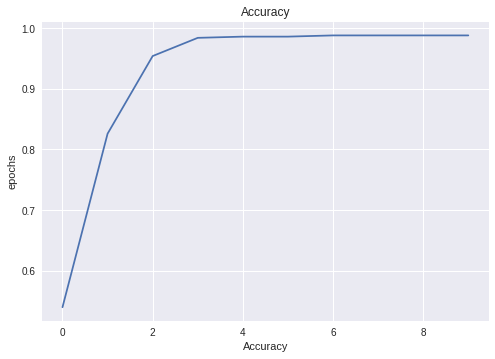

In [81]:
plt.plot(h.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('epochs')
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

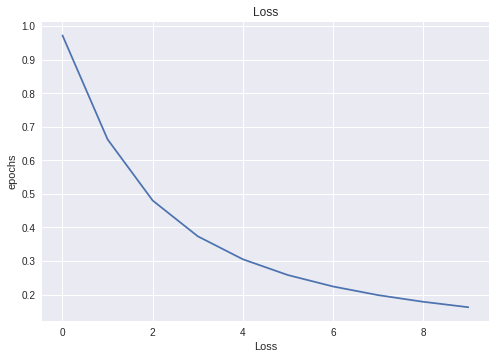

In [82]:
plt.plot(h.history['loss'])
plt.xlabel('Loss')
plt.ylabel('epochs')
plt.title('Loss')

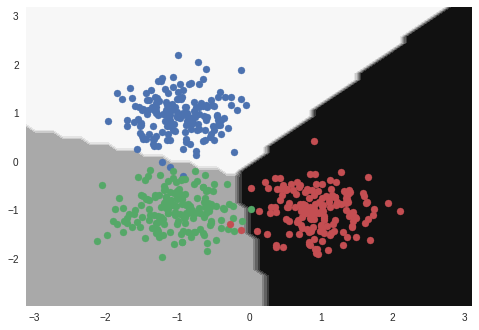

In [92]:
plot_multiclass_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])